In [2]:
import random

def random_kids():
    return random.choice(['boy','girl'])

In [3]:
BothGirls = 0
older_girl = 0
either_girl = 0

In [4]:
random.seed(0)
for _ in range(1000):
    younger = random_kids()
    older = random_kids()
    
    if older == 'girl': older_girl += 1 
    if younger == 'girl' and older == 'girl': BothGirls += 1 
    if younger == 'girl' or older == 'girl': either_girl += 1

In [5]:
print ('P(B|G): ', BothGirls/older_girl)

P(B|G):  0.4949290060851927


In [6]:
print ('P(B|L): ', BothGirls/either_girl)

P(B|L):  0.32232496697490093


In [37]:
from collections import Counter

## Coin flip

In [32]:
def random_coin():
    return random.choice(['head','tail'])

In [35]:
def sample_coin(size):
    return [random_coin()
           for _ in range(size)]

In [36]:
print (sample_coin(10))

['head', 'head', 'head', 'tail', 'head', 'head', 'tail', 'head', 'tail', 'tail']


In [45]:
def coin_count(size):
    return Counter(sample_coin(size))

# Normal distribution

In [83]:
import math
def normal_pdf(x,mu=0,sigma=1):
    sqrt_2_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2 / 2 / sigma ** 2) / (sqrt_2_pi * sigma))

In [84]:
xs = [x / 10.0
     for x in range(-50,50)]

In [85]:
from matplotlib import pyplot as plt

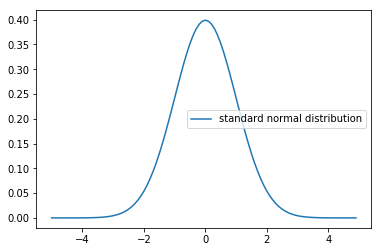

In [87]:
plt.plot(xs,[normal_pdf(x) for x in xs], '-', label = 'standard normal distribution')
plt.legend()

# Binomial distribution

In [88]:
def success_or_fail(p):
    return 1 if random.random() < p else 0

In [95]:
def binomial(p,n):
    return sum(success_or_fail(p)
              for _ in range(n))

Counter({42: 1, 53: 2, 62: 1, 43: 1, 57: 1, 46: 2, 52: 1, 44: 1})

In [113]:
def plot_binomial(p,n,trial):
    data = [binomial(p,n)
           for _ in range(trial)]
    
    probability = [count / trial
                  for count in Counter(data).values()]
    success_count = [success
                    for success in Counter(data).keys()]
    
    plt.bar(success_count,
           probability,
           0.8)
    plt.show()

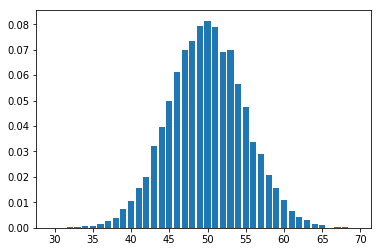

In [118]:
plot_binomial(0.5,100,10000)

# Normal cdf

In [201]:
def normal_cdf(x, mu=0, sigma=1):
    return (1+math.erf((x-mu) / math.sqrt(2) / sigma)) /2

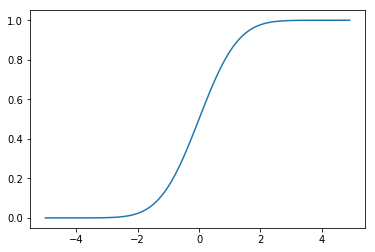

In [202]:
xs = [x/10
     for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x) for x in xs], '-', label = 'standard CDF')
plt.show()

In [203]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
        if mu != 0 or sigma != 1:
            return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
        
        low_z = -10.0
        high_z = 10.0
        while high_z - low_z > tolerance:
            mid_z = (low_z + high_z)/2
            mid_p = normal_cdf(mid_z)
            
            if mid_p < p:
                low_z =  mid_z
                
            if mid_p > p:
                high_z = mid_z
                
            else:
                break
                
        return mid_z

In [204]:
inverse_normal_cdf(0.05)

-5.0

# Hypothesis

In [210]:
def normal_approximation_to_binomial(n,p):
    mu = p*n
    sigma = math.sqrt(p*(1-p)*n)
    return mu, sigma

def coin_flip():
    trial = 1000
    probability = 0.5
    return trial,probability

In [211]:
normal_approximation_to_binomial(1000,0.5)

(500.0, 15.811388300841896)

In [212]:
def upperbound(p, mu=0, sigma=1):
    return inverse_normal_cdf(p, mu, sigma)

def lowerbound(p, mu=0, sigma=1):
    return inverse_normal_cdf(1-p, mu, sigma)

def lower_upper_limit(p, mu=0, sigma=1):
    tail_probability = (1-p)/2
    upper_limit = upperbound(tail_probability, mu=0, sigma=1)
    lower_limit = lowerbound(tail_probability, mu=0, sigma=1)
    
    return upper_limit, lower_limit

In [213]:
mu_hypothesis, sigma_hypothesis = normal_approximation_to_binomial(1000,0.5)

limit = lower_upper_limit(0.95,mu_hypothesis, sigma_hypothesis)
limit

(-5.0, 0.0)